In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df['Sex'] = (df['Sex'].map({'male': '0', 'female':'1'})).astype('int64')

In [6]:
pas_1st = df[df['Pclass']==1]
pas_2st = df[df['Pclass']==2]
pas_3st = df[df['Pclass']==3]

In [7]:
print(len(pas_3st), len(pas_2st),len(pas_1st))

491 184 216


C:\Users\ritup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

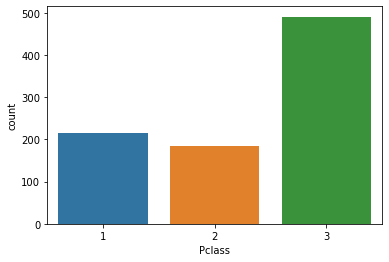

In [8]:
sns.countplot(df['Pclass'])

C:\Users\ritup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

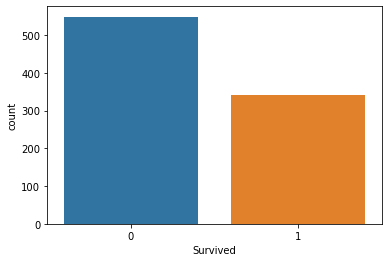

In [9]:
sns.countplot(df['Survived'])

# survival Rate for people in the first and third classes?

In [10]:
surv_1st, surb_3rd = np.mean(df['Survived'][df['Pclass']==1]), np.mean(df[df['Pclass']==3]['Survived'])

<BarContainer object of 2 artists>

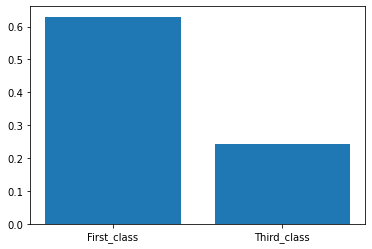

In [11]:
plt.bar(['First_class', 'Third_class'], [surv_1st, surb_3rd])

C:\Users\ritup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

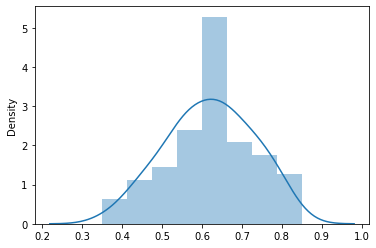

In [12]:
First_class_sample = np.array([np.mean(df[df['Pclass']==1].sample(20)['Survived'].values) for i in range(100)])
sns.distplot(First_class_sample)


In [13]:
Third_Class_sample = np.array([np.mean(df[df['Pclass']==3].sample(20)['Survived'].values) for i in range(100)])

C:\Users\ritup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ritup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


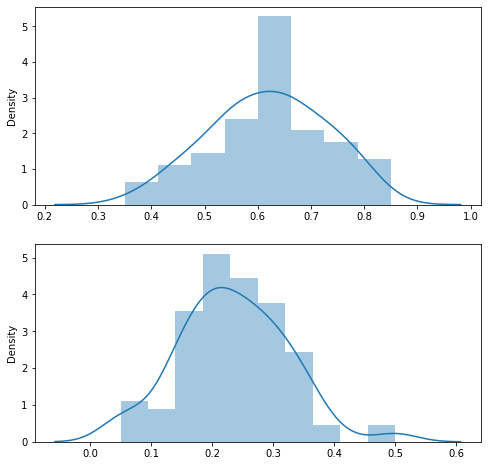

In [14]:
plt.figure(figsize=(8,8))
plt.subplot(211)
sns.distplot(First_class_sample)
# plt.show()
plt.subplot(212)
sns.distplot(Third_Class_sample)
plt.show()

# Zscore = 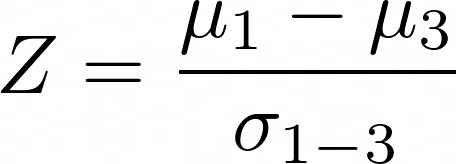

μ₁ is the mean of the first-class and
μ₃ is the mean of the third class (so μ₁ — μ₃ is the observed effect)
σ₁₋₃ is the standard deviation of the distribution of the differences between the two populations

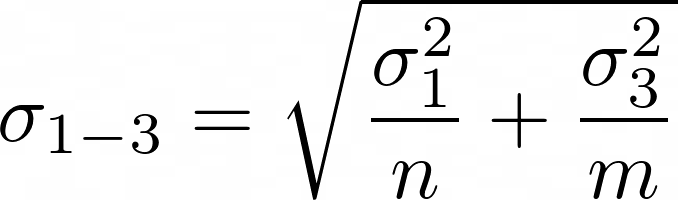

In [15]:
mu_1 = np.mean(First_class_sample)
mu_3 = np.mean(Third_Class_sample)

sigma_diff = np.sqrt((np.std(First_class_sample)**2/len(First_class_sample)) + (np.std(Third_Class_sample)**2/len(Third_Class_sample)))

In [16]:
zscore = (mu_1 - mu_3)/sigma_diff

In [17]:
zscore

27.23518849151485

In [18]:
from scipy.stats import norm
import scipy.stats as stats

stats.norm.sf(abs(zscore))*2

2.4892444985155155e-163

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
df_a = pd.concat([train, test])

In [5]:
df_a

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df_a.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
df_a['Sex'].map({'female': '1', 'male': '0'})

0      0
1      1
2      1
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 1309, dtype: object

C:\Users\ritup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

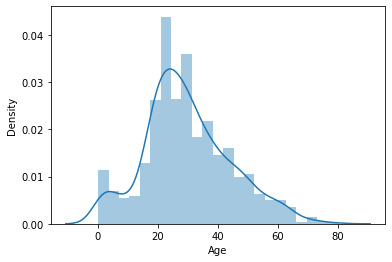

In [46]:
sns.distplot(df_a['Age'])

In [29]:
df = df_a

C:\Users\ritup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ritup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ritup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 0, 'Age PClass = 3')

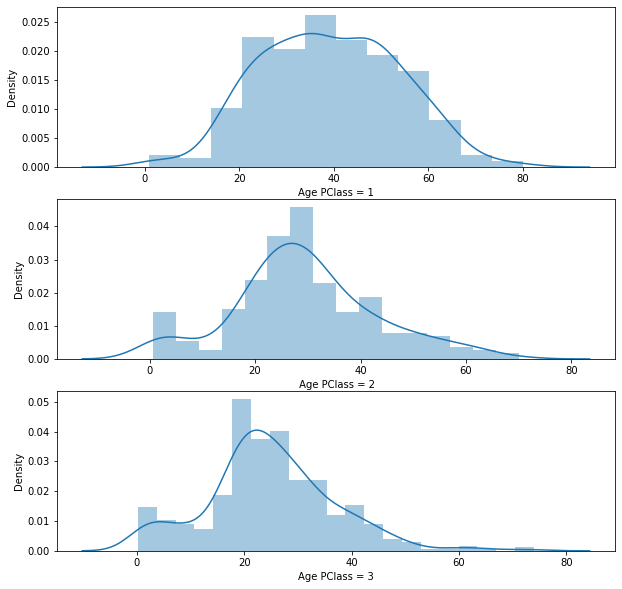

In [45]:
plt.figure(figsize=(10,10))  
plt.subplot(311)
sns.distplot(df[df['Pclass']==1]['Age'])
# plt.xlabel('Age')
plt.xlabel('Age PClass = 1')
plt.subplot(312)
sns.distplot(df[df['Pclass']==2]['Age'])
# plt.xlabel('Age')
plt.xlabel(' Age PClass = 2')
plt.subplot(313)
sns.distplot(df[df['Pclass']==3]['Age'])
# plt.xlabel('Age')
plt.xlabel('Age PClass = 3')

In [51]:
df.groupby(['Pclass', 'Sex'])['Age'].mean()

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

In [52]:
df.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64

In [58]:
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

C:\Users\ritup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

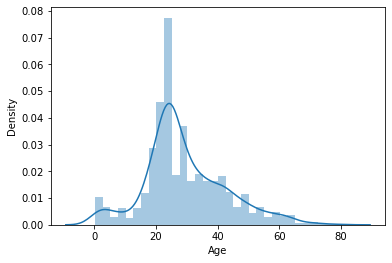

In [59]:
sns.distplot(df['Age'])

In [67]:
df.groupby(['Pclass','Sex'])['Fare'].median()

Pclass  Sex   
1       female    80.92915
        male      49.50420
2       female    23.00000
        male      13.00000
3       female    10.48960
        male       7.89580
Name: Fare, dtype: float64

In [68]:
df.groupby(['Pclass','Sex'])['Fare'].mean()

Pclass  Sex   
1       female    109.412385
        male       69.888385
2       female     23.234827
        male       19.904946
3       female     15.324250
        male       12.415462
Name: Fare, dtype: float64

C:\Users\ritup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

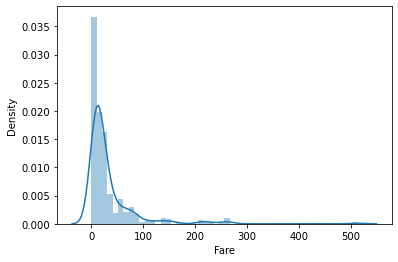

In [69]:
sns.distplot(df['Fare'])

C:\Users\ritup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


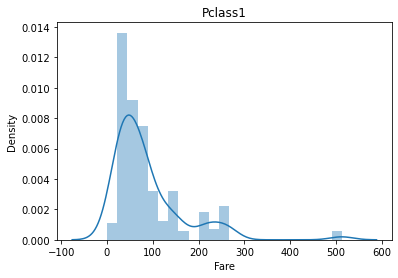

C:\Users\ritup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


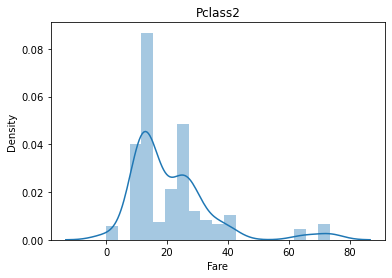

C:\Users\ritup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


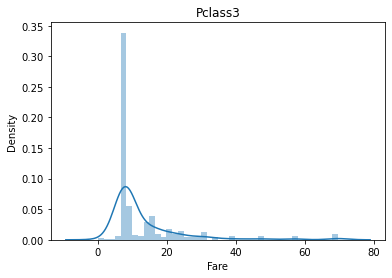

In [74]:
for i in range(1,4):
    plt.title('Pclass'+str(i))
    sns.distplot(df[df['Pclass']==i]['Fare'])
    plt.show()

In [78]:
df['Fare'] = df['Fare'].fillna(df.groupby(['Pclass', 'Sex'])['Fare'].transform('median'))

0

C:\Users\ritup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

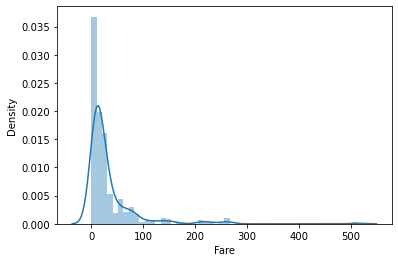

In [79]:
sns.distplot(df['Fare'])

In [90]:
df['Cabin'] = df['Cabin'].fillna('M')

In [135]:
df['Cabin'].unique()

array(['M', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [150]:
df['Cabin'] = df['Cabin'].str.replace('^C.*','C')
df['Cabin'] = df['Cabin'].str.replace('^B.*','B')
df['Cabin'] = df['Cabin'].str.replace('^A.*','A')
df['Cabin'] = df['Cabin'].str.replace('^D.*','D')
df['Cabin'] = df['Cabin'].str.replace('^E.*','E')
df['Cabin'] = df['Cabin'].str.replace('^F.*','F')
df['Cabin'] = df['Cabin'].str.replace('^G.*','G')

C:\Users\ritup\AppData\Local\Temp\ipykernel_7108\3153207760.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cabin'] = df['Cabin'].str.replace('^C.*','C')
C:\Users\ritup\AppData\Local\Temp\ipykernel_7108\3153207760.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cabin'] = df['Cabin'].str.replace('^B.*','B')
C:\Users\ritup\AppData\Local\Temp\ipykernel_7108\3153207760.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cabin'] = df['Cabin'].str.replace('^A.*','A')
C:\Users\ritup\AppData\Local\Temp\ipykernel_7108\3153207760.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cabin'] = df['Cabin'].str.replace('^D.*','D')
C:\Users\ritup\AppData\Local\Temp\ipykernel_7108\3153207760.py:5: FutureWarning: The default value of regex will change from True to False in a future v

In [162]:
df['Cabin'] = df['Cabin'].replace(['A', 'B', 'C'], 'ABC')
df['Cabin'] = df['Cabin'].replace(['D', 'E'], 'DE')
df['Cabin'] = df['Cabin'].replace(['F', 'G'], 'FG')

C:\Users\ritup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='count'>

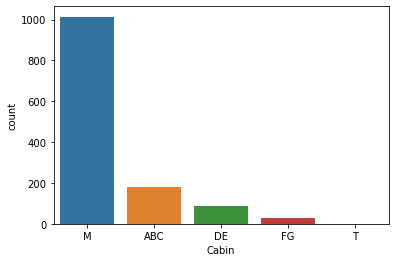

In [163]:
sns.countplot(df['Cabin'])

In [173]:
df.groupby(['Cabin', 'Survived'])['Survived'].count()

Cabin  Survived
ABC    0.0          44
       1.0          77
DE     0.0          16
       1.0          49
FG     0.0           7
       1.0          10
M      0.0         481
       1.0         206
T      0.0           1
Name: Survived, dtype: int64

In [174]:
df.groupby(['Cabin'])['Survived'].count()

Cabin
ABC    121
DE      65
FG      17
M      687
T        1
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Cabin'>

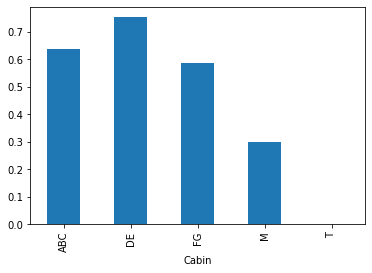

In [171]:
df.groupby(['Cabin'])['Survived'].mean().plot(kind = 'bar')

In [179]:
df['Survived'].groupby([df['Cabin'],df['Survived'], df['Pclass']]).count()

Cabin  Survived  Pclass
ABC    0.0       1          44
       1.0       1          77
DE     0.0       1          14
                 2           2
       1.0       1          40
                 2           6
                 3           3
FG     0.0       2           1
                 3           6
       1.0       2           7
                 3           3
M      0.0       1          21
                 2          94
                 3         366
       1.0       1          19
                 2          74
                 3         113
T      0.0       1           1
Name: Survived, dtype: int64

In [213]:
df[(df['Sex']=='female') & (df['Pclass']==1) & (df['Cabin']=='ABC')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,ABC,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,ABC,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,ABC,S
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,36.0,1,0,PC 17569,146.5208,ABC,C
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,ABC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1287,NaN,1,"Smith, Mrs. Lucien Philip (Mary Eloise Hughes)",female,18.0,1,0,13695,60.0000,ABC,S
397,1289,NaN,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1,1,13567,79.2000,ABC,C
400,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,ABC,S
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,ABC,Q


In [189]:
df.drop(['Cabins'], axis = 1, inplace= True)

In [218]:
df['Embarked'].fillna('S', inplace=True)
# ['Embarked']

In [226]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C':1, 'Q':2})

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 165.2+ KB


In [230]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [250]:
df_train = df[df['Survived'].notnull()].drop(['Cabin', 'Name', 'Ticket', 'Parch'], axis = 1)

In [251]:
df_test = df[df['Survived'].isnull()].drop(['Cabin', 'Name', 'Ticket', 'Parch'], axis = 1)

In [252]:
X_train = df_train.drop('Survived', axis = 1)
Y_train = df_train['Survived']

In [253]:
X_test = df_test.drop('Survived', axis = 1)
Y_test = df_test['Survived']

In [268]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, RocCurveDisplay, accuracy_score

In [280]:
model = DecisionTreeClassifier()

In [281]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [284]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



In [300]:
params = {'criterion':['gini','entropy'],
    'max_depth':[1,3,5,6,7],
    'min_samples_split': [2,4],
    'min_samples_leaf':[1,2,4],
}
cv = GridSearchCV(model, param_grid= params, cv = 10, scoring= 'accuracy' )

In [301]:
prediction = model.predict(X_test)

In [302]:
cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4]},
             scoring='accuracy')

In [303]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

[Text(0.4934403888665595, 0.9772727272727273, 'X[2] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.18734299638263666, 0.9318181818181818, 'X[3] <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.012861736334405145, 0.8863636363636364, 'X[4] <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.006430868167202572, 0.8409090909090909, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.01929260450160772, 0.8409090909090909, 'X[3] <= 2.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.012861736334405145, 0.7954545454545454, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.02572347266881029, 0.7954545454545454, 'X[3] <= 3.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.01929260450160772, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03215434083601286, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3618242564308682, 0.8863636363636364, 'X[1] <= 1.5\ngini = 0.28\nsamples = 553\nvalue = [460, 93]'),
 Text(0

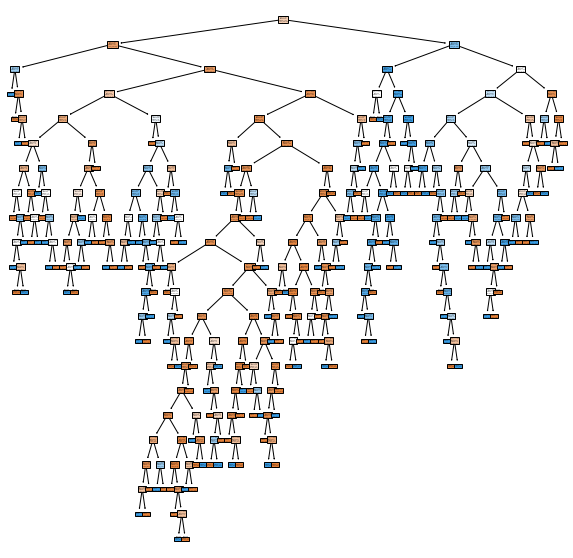

In [293]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model, filled= True)

In [304]:
cv.predict(X_test)

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.